In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Problem - 1: Perform a classification task with knn from scratch.

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Python Sem 3 Workshop /dataset/Copy of diabetes.csv')
print(df.head(10))
print(df.dtypes)
print('Missing Values\n')
print(df.isnull().sum())
print('Summary Statistics\n')
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [17]:
df = df.fillna(df.median())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [36]:
X= df.drop(columns =['Outcome']).values
y= df['Outcome'].values

print("The shape of X: ",X.shape)
print("The shape ofY: ",y.shape)

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):

    # Moved np.random.seed inside the function
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0]) # Changed arrange to arange
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size) # Changed len[X] to len(X)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    x_train = X[train_indices]
    x_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=42)

print("The shape of X_train: ", x_train.shape)
print("The shape of X_test: ", x_test.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X:  (768, 8)
The shape ofY:  (768,)
The shape of X_train:  (538, 8)
The shape of X_test:  (230, 8)
The shape of y_train:  (538,)
The shape of y_test:  (230,)


Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [28]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

try:
  x1 = np.array([3,4])
  x2 = np.array([0,0])

  distance = euclidean_distance(x1, x2)
  expected_distance = 5.0

  assert np.isclose(distance, expected_distance), f"Expected {expected_distance}, but got {distance}"
  print("Test passed!")
except ValueError as e:
  print(f"ValueError: {e}")
except AssertionError as ae:
  print(f"AssertionError: {ae}" )
except Exception as ve:
  print(f"An unexpected error occurred: {ve}")
#Starting to find the euclidean Distance





Test passed!


In [37]:
def knn_predict_single(x_train, y_train, x_test, k=3):

  distances = [euclidean_distance(x_test, x) for x in x_train] # Fixed: Removed extra indentation and used x_test instead of query

  sorted_indices = np.argsort(distances)

  nearest_indices = sorted_indices[:k]

  nearest_labels = y_train[nearest_indices]

  prediction = np.bincount(nearest_labels).argmax()

  return prediction

def knn_predict(x_train, y_train, x_test, k=3):
    predictions = [knn_predict_single(x_train, y_train, x, k) for x in x_test] # Fixed: Removed extra indentation
    return np.array(predictions)

try:
    x_test_sample = x_test[:5]
    y_test_sample = y_test[:5]

    predictions = knn_predict(x_train, y_train, x_test_sample, k=3)

    print("Predictions:", predictions)
    print("Actual Labels:", y_test_sample)

    assert predictions.shape == y_test_sample.shape, "The shape of predictions and y_test_sample must be the same."

    print("Test case passed")
except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 1]
Actual Labels: [0 0 0 0 0]
Test case passed


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


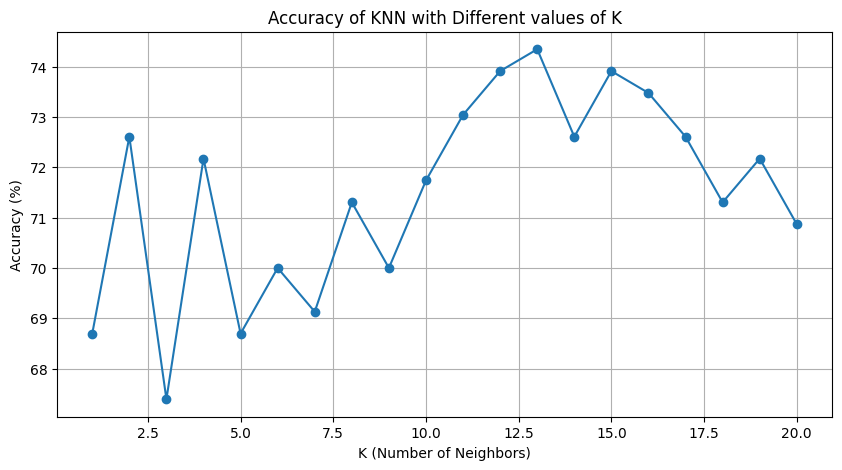

Experiment completed successfully.


In [38]:
def compute_accuracy(y_true, y_pred):

    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

def experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values):

    accuracies = {}

    for k in k_values:
        predictions = knn_predict(x_train, y_train, x_test, k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")  # Moved into the loop for each k

    plt.figure(figsize=(10, 5))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different values of K')
    plt.grid(True)
    plt.show()

    return accuracies

# Correct the range definition
k_values = range(1, 21)

try:
    # Ensure that the variables below are defined before calling this function
    accuracies = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
    print("Experiment completed successfully.")

except Exception as e:
    print(f"An error occurred during the experiment: {e}")